# A Randomized Hill Climbing Approach to $R(3, k)$ Lower Bounds

**Goal:** We will use a heuristic-based local search algorithms to search for $R(3, k)$ lower bounds. 

**The glueing method:** Take a vertex $v$ of degree $d$. We would like to attach it to some graph $H \in R(3, k-1, n - d - 1)$. So for each neighbor $w$ of $v$, we will make a neighborhood of vertices for $w$ in $H$. These $d$ neighborhoods must be independent sets (in order to ensure no triangles are made in the glueing process). 

**The Warm-Up:** Some example questions to consider:
1. What is the best $n$ we can get from $H \in R(3, 9, 35)$? Can we get 37? 39? 40?
2. What if we use different $H$ graphs, like those in $R(3, 9, 38)$?
3. What if we try values of $k > 10$? What $H$ would we use then? What degree $d$ would be logical to try with $H$?

In [1]:
from sage.graphs.graph_input import from_graph6

In [4]:
with open('r39_35.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    one_graph = file.readlines() 

In [6]:
r39_35 = Graph() # Create an empty graph
from_graph6(r39_35, one_graph[0]) # Populate it with the first graph in the g6 file. 

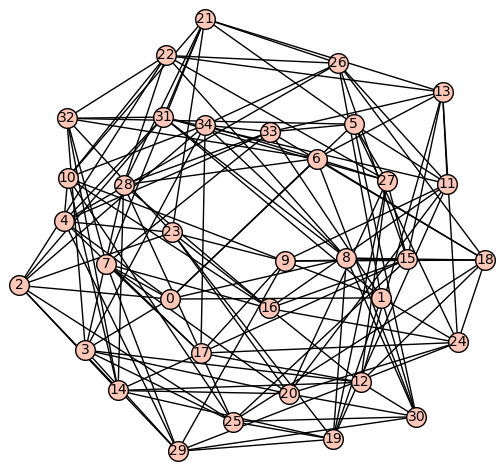

In [7]:
r39_35.plot()

## High Level Overview of the Algorithm

Here is one way to approach local search. Our state space is going to be a tuple of $d$ independent sets. Let us call them $N_1, N_2, ..., N_d$. Our objective function is going to be 
$$f(N_1, N_2, ..., N_d) = \text{number of $k$-sized independent sets}.$$
A swap or a "move" in the state-space will be kicking out the neighborhood responsible for many $k$-sized independent sets (probably, $N_i$ doesn't intersect enough large independent sets in $H$) and adding in a new independent set as $N_i$ (the independent set which would output the best $f$ value, say).  

This is just one implementation of local search. Tinkering around with the state space, objective function, swap, etc. may lead to faster and smarter hill climbing approaches.  

## Time to Climb Some Hills

In [ ]:
"""
Description: To maintain a triangle-free graph in the process of glueing, we want N_i to be independent sets. 
Input: H is the graph we will be gluing v's neighbors' neighborhoods onto. 
Input: n is the number of vertices we want our end graph to be.  
Input: k is the Ramsey number we're looking for. 
Input: ramsey_3_k_minus_1 R(3, k - 1) (needed to bound degrees).
Output: All the independent sets of appropriate size in H. They must be of size at most k - 2 and size at least n - R(3, k - 1) - 1.
"""

R3k = [False,1,3,6,9,14,18,23,28,36] #R3k[i] equals the number R(3,i)

from sage.graphs.independent_sets import IndependentSets

def potential_neighborhoods(H, n, k, ramsey_3_k_minus_1):
    neighborhoods = []
    min_size = n - ramsey_3_k_minus_1
    max_size = k - 2
    indsets = list(IndependentSets(H))
    for indset in indsets:
        if len(indset) >= min_size and len(indset) <= max_size:
            neighborhoods.append(indset)
        else:
            continue
    return neighborhoods

potential_neighborhoods(r39_35,39,10,R3k[10-1])

In [ ]:
"""
Description: Given a tuple of independent sets, here's the glueing corresponding to it. 
Input: H is the subgraph we are glueing into. 
Input: n is the number of vertices in the end.  
Input: k is Ramsey number we're investigating 
Input: state is the tuple of independent sets.
Output: The graph from the resulting glueing. 
"""

import sys

def create_vertices(H,d): #constructs the vertex of degree d along with its neighborhood
    new_vertices = d + 1
    M = [[] for i in range(new_vertices)]
    M[0] = [1 for i in range(new_vertices)]
    M[0][0] = 0
    for v in range(1,new_vertices):
        M[v] = [0 for i in range(new_vertices)]
        M[v][0] = 1
    vertices = Graph(matrix(M))
    return vertices

def glue_into_graph(vertices, H, n, k, state):
    if len(list(V.vertices())) + len(list(H.vertices())) != n:
        sys.exit('Wrong number of vertices')
    G = vertices.disjoint_union(H)
    for i in range(1,len(state)+1):
        for vertex in state[i-1]:
            G.add_edge((0,i),(1,vertex))
    return G

vertices = create_vertices(r39_35,3)
G = glue_into_graph(vertices,r39_35,39,9,([1,2,3,4],[20,33,12,11],[5,9,8,13]))
G.plot()

In [ ]:
"""
Description: This is the objective function. 
Input: The state we are in. 
Output: The score of the state. The lower score, the better. 
"""

def objective_function(vertices, H, n, k, state):
    G = glue_into_graph(vertices,r39_35,39,9,state)
    I = (x for x in IndependentSets(G) if len(x) ==  k)
    value = len(list(I))
    return value

objective_function(vertices,r39_35,39,9,([1,2,3,4],[20,33,12,11],[5,9,8,13]))

In [ ]:
import itertools
"""
Description: This method walks around, looking for glueings that make less and less 10-sized independent sets. 
Input: H is the subgraph we are glueing into. 
Input: n is the number of vertices in the end.  
Input: k is Ramsey number we're investigating 
Input: d is the degree of v.
Output: Print step by step results of the local search. 
"""
def local_search(H, n, k, d):
    RAMSEY_CONSTANTS = [] # Populate this list. 
    neighborhoods = potential_neighborhoods(H, n, k, RAMSEY_CONSTANTS[k-1])
    state_space = itertools.product(neighborhoods, repeat=d)
    
    can_move = True
    
    while can_move:
        break # Implement method here.
    